In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, ReLU, Softmax
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
import numpy as np
from tensorflow.keras.layers import Dropout

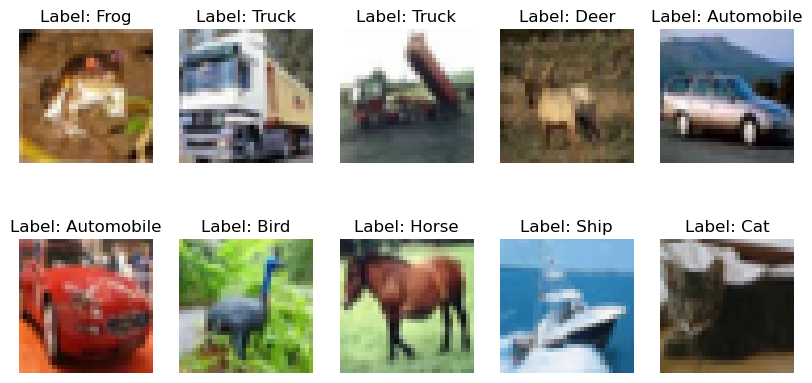

In [67]:
# Charger le dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normaliser les images (valeurs entre -1 et 1)
x_train = x_train / 255.0 * 2 - 1
x_test = x_test / 255.0 * 2 - 1

# One-hot encoding des labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Noms des classes
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Afficher quelques exemples d'images avec leurs labels
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow((x_train[i] + 1) / 2)  # Re-normalisation pour affichage correct
    plt.title(f"Label: {class_names[y_train[i][0]]}")
    plt.axis('off')
plt.show()

In [80]:
# Définir le modèle Fully Connected
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),          # Aplatir les images
    Dense(512),                                # Première couche dense avec 512 neurones
    ReLU(),                                    # Fonction d'activation ReLU
    BatchNormalization(),
    Dense(256), # Deuxième couche dense avec 256 neurones
    ReLU(),                                    # Fonction d'activation ReLU
    BatchNormalization(),
    Dense(10, activation='softmax')            # Couche de sortie pour 10 classes
])

# Résumé du modèle
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_23 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_33 (ReLU)                      │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_34 (ReLU)                      │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [86]:
# Compiler le modèle
model.compile(
    optimizer='adam',  # Utilisation de l'optimiseur Adam
    loss='categorical_crossentropy',  # Fonction de perte pour classification
    metrics=['accuracy']  # Évaluer la précision pendant l'entraînement
)

# Entraîner le modèle
history = model.fit(
    x_train, y_train_one_hot,  # Données d'entraînement et labels
    epochs=10,                # Nombre d'époques
    batch_size=64,            # Taille du batch
    validation_data=(x_test, y_test_one_hot)  # Données de validation
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.8636 - loss: 0.3929 - val_accuracy: 0.5405 - val_loss: 1.8602
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8758 - loss: 0.3576 - val_accuracy: 0.5441 - val_loss: 1.9308
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8826 - loss: 0.3355 - val_accuracy: 0.5464 - val_loss: 1.9158
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8892 - loss: 0.3197 - val_accuracy: 0.5435 - val_loss: 1.9542
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8924 - loss: 0.3035 - val_accuracy: 0.5446 - val_loss: 2.0416
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8973 - loss: 0.2924 - val_accuracy: 0.5469 - val_loss: 2.0662
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9053 - loss: 0.2688 - val_accuracy: 0.5487 - val_loss: 2.0973
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9141 - loss: 0.2481 - 

In [87]:
# Évaluer le modèle sur le jeu de test
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5409 - loss: 2.2462
Test Loss: 2.2613
Test Accuracy: 54.04%
